In [15]:
import sys
print(sys.version)
print(sys.executable)

3.7.1 (default, Dec 14 2018, 19:28:38) 
[GCC 7.3.0]
/home/hd/software/anaconda3/envs/GLGExplainer/bin/python


In [16]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from local_explanations import *
import utils
import models
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import torch
import torch_geometric.transforms as T
from torch_geometric.utils import from_networkx, to_networkx

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Read hyper-parameters and data

In [29]:
DATASET_NAME = "Mutagenicity"

with open("../config/" + DATASET_NAME + "_params.json") as json_file:
    hyper_params = json.load(json_file)
print(hyper_params)

{'len_lr': 0.0005, 'proto_lr': 0.001, 'le_emb_lr': 0.001, 'coeff_divloss': 0.01, 'coeff_pdist': 0.01, 'coeff_gae': 0.0, 'coeff_r1': 0.09, 'coeff_r2': 0.00099, 'coeff_ce': 0.0, 'coeff_de': 0.0, 'coeff_logic_loss': 0.0, 'focal_gamma': 2, 'focal_alpha': -1, 'ts': 1, 'te': 1, 'focal_loss': True, 'debug_prototypes': False, 'num_prototypes': 2, 'dim_prototypes': 10, 'num_le_features': 14, 'embedder_backbone': 'GIN', 'embedder_num_layers': 2, 'activation': 'leaky', 'assign_func': 'discrete', 'LEN_temperature': 1, 'remove_attention': True, 'manual_cut': 0.37731856, 'log_images': False, 'log_models': False, 'log_wandb': False, 'num_epochs': 500}


In [18]:
adjs_train , \
edge_weights_train , \
ori_adjs_train , \
ori_classes_train , \
belonging_train , \
summary_predictions_train , \
le_classes_train ,\
embeddings_train = read_mutagenicity(evaluate_method=False, 
                                     manual_cut=hyper_params["manual_cut"],
                                     split="TRAIN")

In [19]:
adjs_val , \
edge_weights_val , \
ori_adjs_val , \
ori_classes_val , \
belonging_val , \
summary_predictions_val , \
le_classes_val ,\
embeddings_val = read_mutagenicity(evaluate_method=False, 
                                   manual_cut=hyper_params["manual_cut"],
                                   split="VAL")

In [20]:
adjs_test , \
edge_weights_test , \
ori_adjs_test , \
ori_classes_test , \
belonging_test , \
summary_predictions_test , \
le_classes_test ,\
embeddings_test = read_mutagenicity(evaluate_method=False, 
                                   manual_cut=hyper_params["manual_cut"],
                                   split="TEST")

In [21]:
device = "cpu" #torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = None

dataset_train = utils.LocalExplanationsDataset("", adjs_train, "embeddings", transform=transform, y=le_classes_train, belonging=belonging_train, task_y=ori_classes_train, precomputed_embeddings=embeddings_train)
dataset_val   = utils.LocalExplanationsDataset("", adjs_val, "embeddings", transform=transform, y=le_classes_val, belonging=belonging_val, task_y=ori_classes_val, precomputed_embeddings=embeddings_val)
dataset_test  = utils.LocalExplanationsDataset("", adjs_test, "embeddings", transform=transform, y=le_classes_test, belonging=belonging_test, task_y=ori_classes_test, precomputed_embeddings=embeddings_test)

### Train GLGExplainer

[{'params': [Parameter containing:
tensor([[-2.6096e-01, -1.9123e-01, -2.4217e-01, -8.0840e-02, -9.7363e-02,
          3.8270e-02, -4.9420e-02,  1.2563e-01,  2.4502e-01,  9.5891e-02,
         -1.0529e-01, -2.5026e-01,  9.6803e-02, -1.3242e-01],
        [ 1.3600e-01,  1.7866e-01,  1.0309e-01,  2.5077e-01,  2.5384e-01,
          5.6590e-02, -1.9474e-01,  2.3878e-01, -1.2681e-01, -1.2624e-01,
          2.2364e-01,  2.0708e-01,  8.0753e-02,  1.6753e-02],
        [-2.2481e-01, -2.7743e-02,  2.5634e-01,  6.8060e-02,  2.2882e-02,
         -5.5497e-02, -9.3216e-02,  1.5929e-01,  1.6482e-02,  1.7387e-01,
         -4.7305e-02,  1.1677e-01,  1.1032e-01,  4.2619e-02],
        [ 1.6794e-01,  1.6748e-01,  2.4773e-01,  2.0546e-01, -6.8338e-02,
         -2.2627e-01,  4.8860e-02, -2.3327e-03, -6.9709e-02, -4.4754e-02,
          1.2570e-02,  1.9500e-01,  8.3316e-02, -9.4903e-02],
        [-1.0990e-01, -6.6182e-02, -1.0330e-01,  2.4033e-01,  1.4155e-01,
          2.4133e-01,  8.5353e-04,  5.3899e-02,  9.

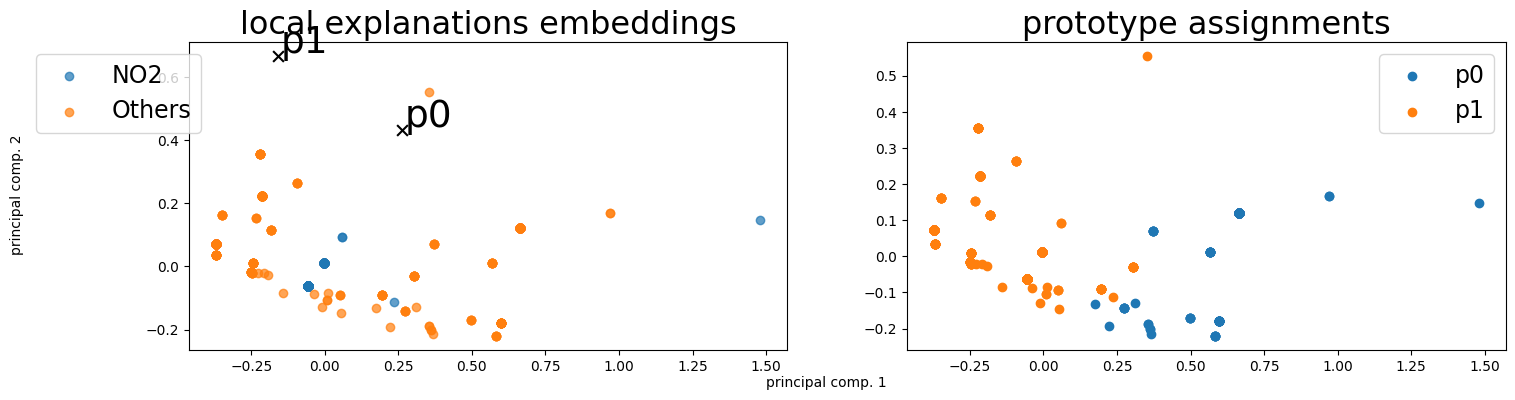

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.848798 +- 0.145249
Concept distribution:  (array([0, 1]), array([168, 958]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)

tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
       

ValueError: Found input variables with inconsistent numbers of samples: [797, 1126]

In [33]:
train_group_loader = utils.build_dataloader(dataset_train, belonging_train, num_input_graphs=128)
val_group_loader   = utils.build_dataloader(dataset_val,   belonging_val, num_input_graphs=256)
test_group_loader  = utils.build_dataloader(dataset_test,  belonging_test, num_input_graphs=256)


torch.manual_seed(42)
len_model    = models.LEN(hyper_params["num_prototypes"], 
                          hyper_params["LEN_temperature"], 
                          remove_attention=hyper_params["remove_attention"]).to(device)
le_model     = models.LEEmbedder(num_features=hyper_params["num_le_features"], 
                                 activation=hyper_params["activation"], 
                                 num_hidden=hyper_params["dim_prototypes"]).to(device)
expl         = models.GLGExplainer(len_model, 
                                   le_model, 
                                   device, 
                                   hyper_params=hyper_params,
                                   classes_names=mutag_classes_names,
                                   dataset_name=DATASET_NAME,
                                   num_classes=len(train_group_loader.dataset.data.task_y.unique())
                                  ).to(device)

expl.iterate(train_group_loader, val_group_loader, plot=True)

(array([0., 1.], dtype=float32), array([675, 451]))
[0.8435132  0.10110831]


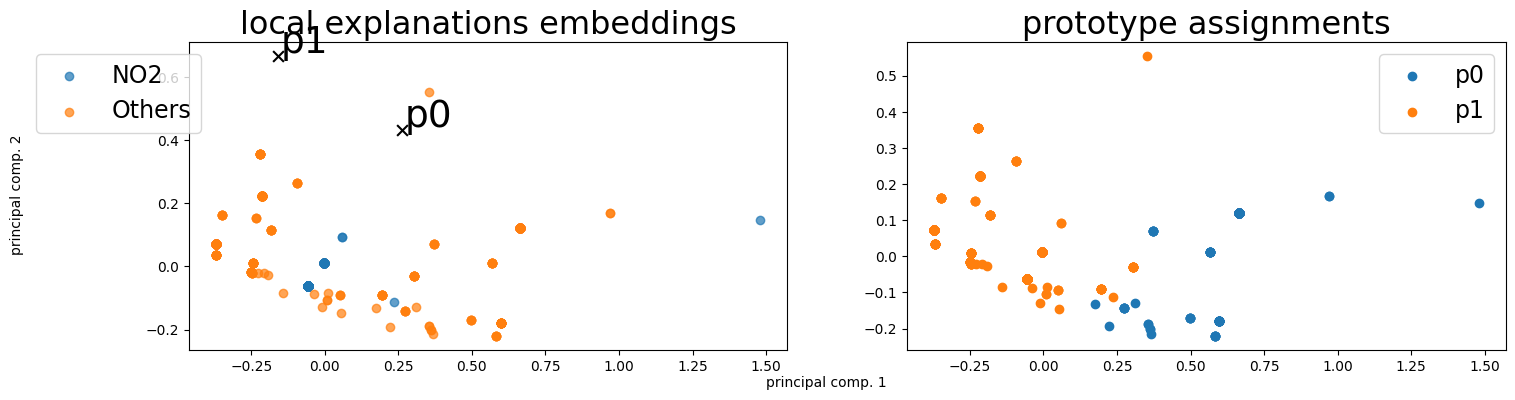

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.848798 +- 0.145249
Concept distribution:  (array([0, 1]), array([168, 958]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)
  1: Loss: 0.10040, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.10472, V. LEN 0.000
  2: Loss: 0.06896, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.07568, V. LEN 0.000
  3: Loss: 0.04848, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.05662, V. LEN 0.000
  4: Loss: 0.03031, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.03170, V. LEN 0.000
  5: Loss: 0.01222, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.01700, V. LEN 0.000
  6: Loss: 0.00845, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.01197, V. LEN 0.000
  7: Loss: 0.00597, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00810, V. LEN 0.000
  8: Loss: 0.00417, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00577, V. LEN 0.000


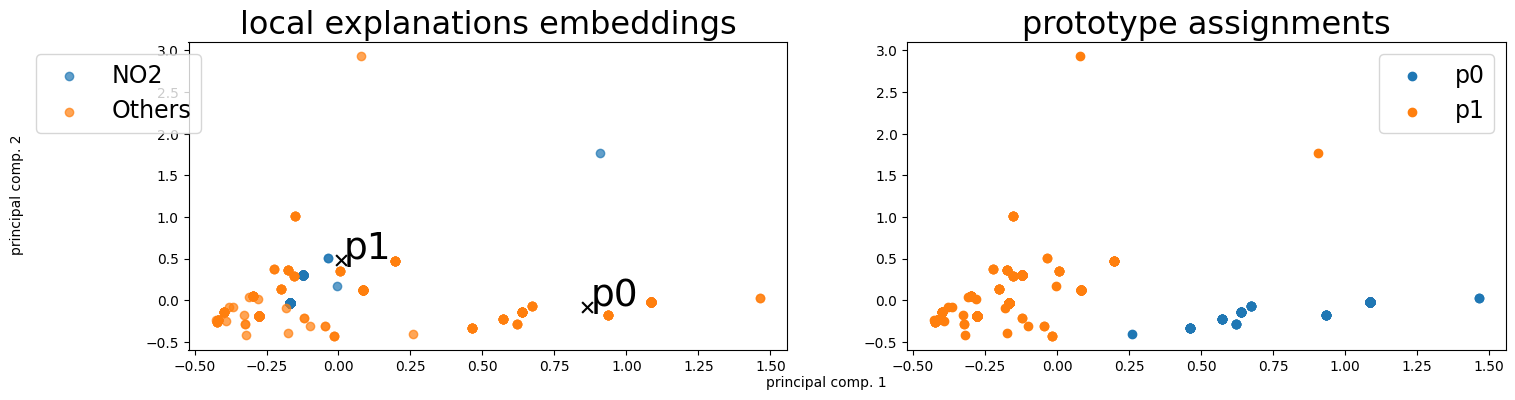

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.852296 +- 0.147704
Concept distribution:  (array([0, 1]), array([168, 958]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


 20: Loss: 0.00160, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00530, V. LEN 0.000
 21: Loss: 0.00188, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00433, V. LEN 0.000
 22: Loss: 0.00188, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00337, V. LEN 0.000
 23: Loss: 0.00167, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00327, V. LEN 0.000
 24: Loss: 0.00173, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00357, V. LEN 0.000
 25: Loss: 0.00166, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00381, V. LEN 0.000
 26: Loss: 0.00208, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00273, V. LEN 0.000
 27: Loss: 0.00171, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00218, V. LEN 0.00

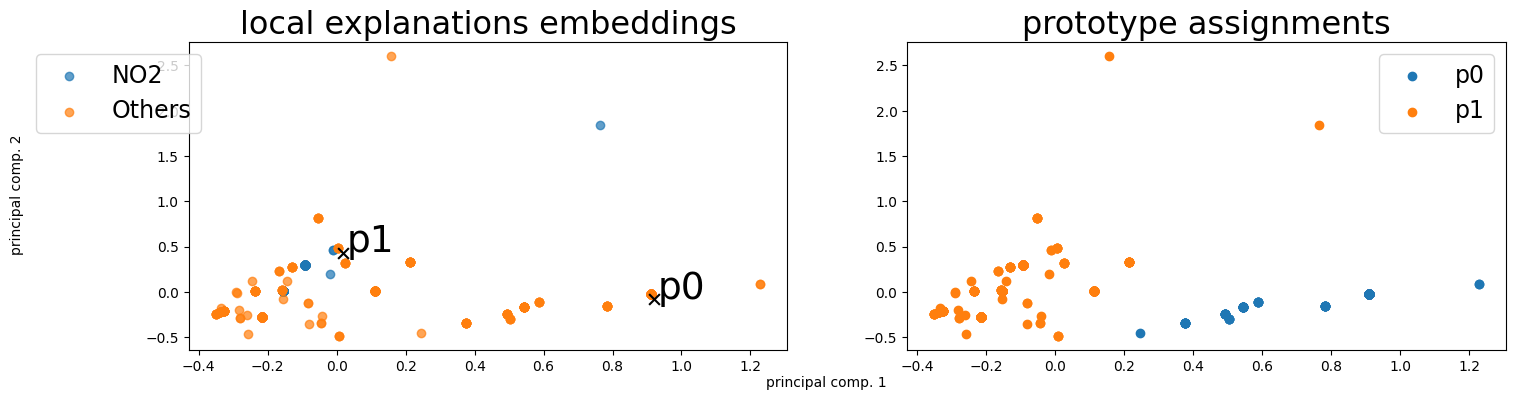

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.852296 +- 0.147704
Concept distribution:  (array([0, 1]), array([168, 958]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


 40: Loss: 0.00173, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00238, V. LEN 0.000
 41: Loss: 0.00108, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00134, V. LEN 0.000
 42: Loss: 0.00143, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00158, V. LEN 0.000
 43: Loss: 0.00145, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00161, V. LEN 0.000
 44: Loss: 0.00152, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00180, V. LEN 0.000
 45: Loss: 0.00106, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00250, V. LEN 0.000
 46: Loss: 0.00073, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00319, V. LEN 0.000
 47: Loss: 0.00108, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00289, V. LEN 0.00

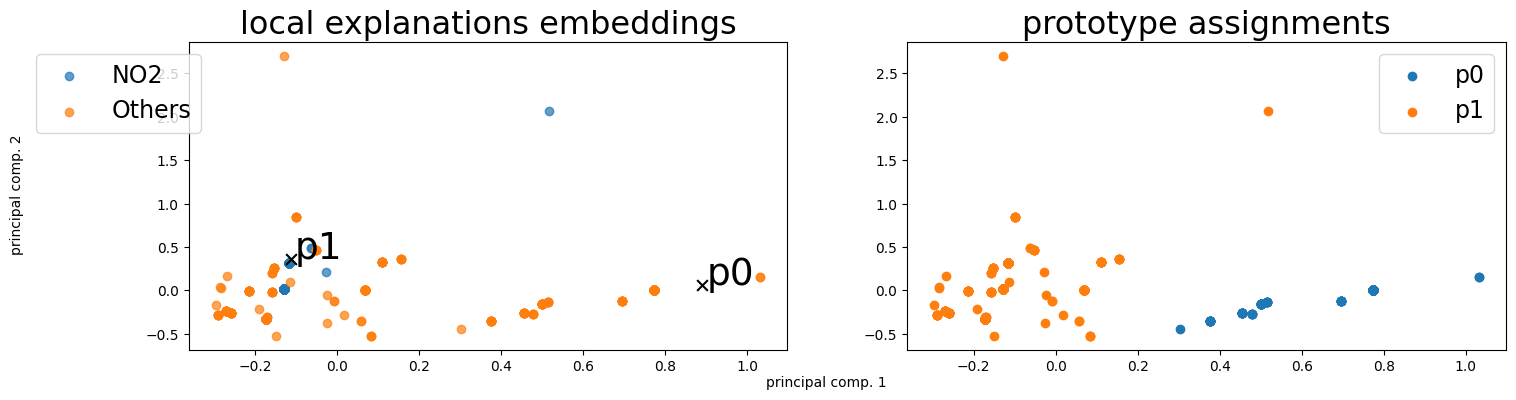

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.852296 +- 0.147704
Concept distribution:  (array([0, 1]), array([168, 958]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


 60: Loss: 0.00091, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00133, V. LEN 0.000
 61: Loss: 0.00070, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00224, V. LEN 0.000
 62: Loss: 0.00067, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00328, V. LEN 0.000
 63: Loss: 0.00089, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00252, V. LEN 0.000
 64: Loss: 0.00071, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00215, V. LEN 0.000
 65: Loss: 0.00086, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00177, V. LEN 0.000
 66: Loss: 0.00067, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00148, V. LEN 0.000
 67: Loss: 0.00154, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00141, V. LEN 0.00

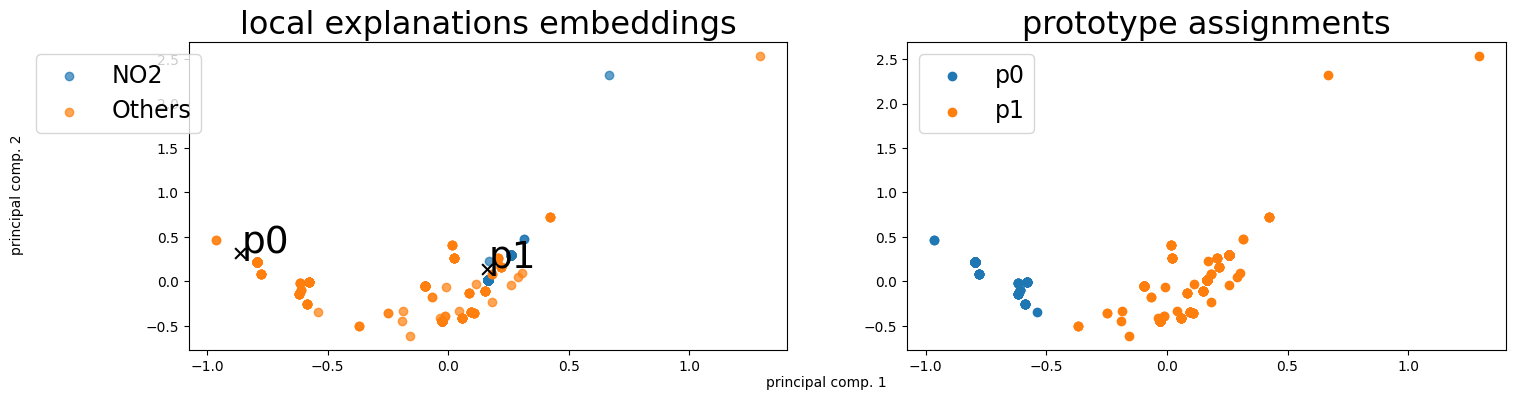

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.852296 +- 0.147704
Concept distribution:  (array([0, 1]), array([168, 958]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


 80: Loss: 0.00056, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00135, V. LEN 0.000
 81: Loss: 0.00038, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00153, V. LEN 0.000
 82: Loss: 0.00037, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00145, V. LEN 0.000
 83: Loss: 0.00062, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00160, V. LEN 0.000
 84: Loss: 0.00083, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00180, V. LEN 0.000
 85: Loss: 0.00047, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00123, V. LEN 0.000
 86: Loss: 0.00057, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00106, V. LEN 0.000
 87: Loss: 0.00048, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00109, V. LEN 0.00

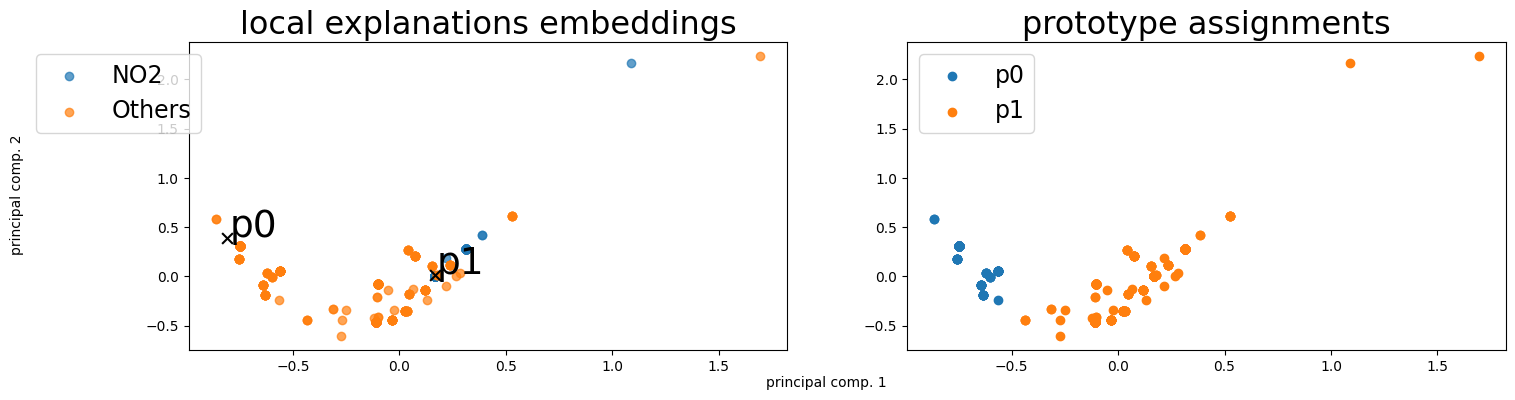

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.852296 +- 0.147704
Concept distribution:  (array([0, 1]), array([168, 958]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


100: Loss: 0.00036, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00069, V. LEN 0.000
101: Loss: 0.00038, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00082, V. LEN 0.000
102: Loss: 0.00046, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00145, V. LEN 0.000
103: Loss: 0.00031, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00303, V. LEN 0.000
104: Loss: 0.00040, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00188, V. LEN 0.000
105: Loss: 0.00033, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00110, V. LEN 0.000
106: Loss: 0.00037, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00119, V. LEN 0.000
107: Loss: 0.00037, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00172, V. LEN 0.00

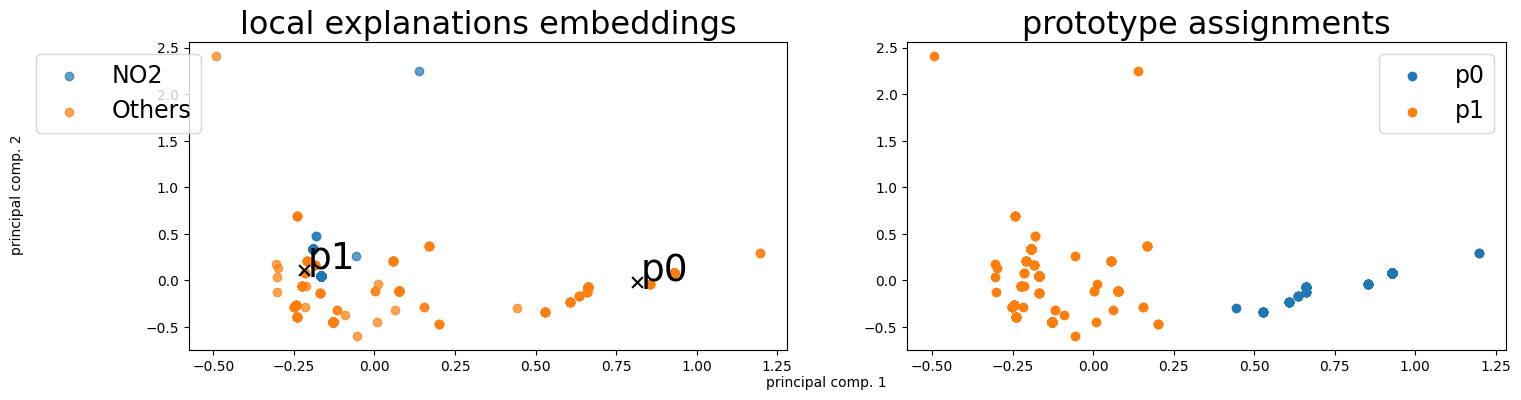

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.852296 +- 0.147704
Concept distribution:  (array([0, 1]), array([168, 958]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


120: Loss: 0.00060, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00165, V. LEN 0.000
121: Loss: 0.00055, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00064, V. LEN 0.000
122: Loss: 0.00049, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00104, V. LEN 0.000
123: Loss: 0.00030, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00237, V. LEN 0.000
124: Loss: 0.00038, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00239, V. LEN 0.000
125: Loss: 0.00056, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00164, V. LEN 0.000
126: Loss: 0.00045, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00148, V. LEN 0.000
127: Loss: 0.00027, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00129, V. LEN 0.00

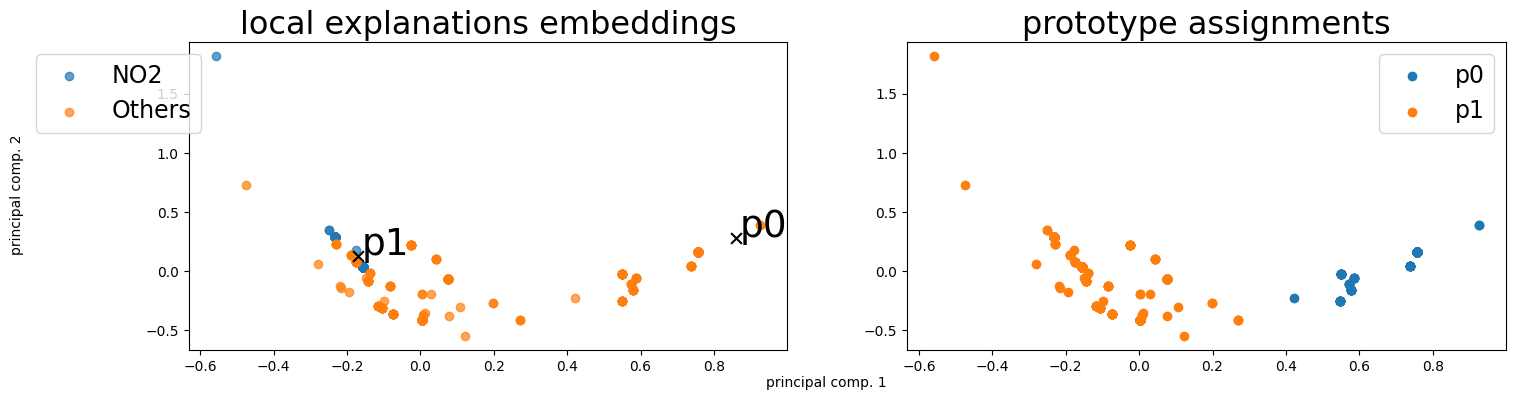

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.852296 +- 0.147704
Concept distribution:  (array([0, 1]), array([168, 958]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


140: Loss: 0.00027, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00167, V. LEN 0.000
141: Loss: 0.00029, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00177, V. LEN 0.000
142: Loss: 0.00091, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00258, V. LEN 0.000
143: Loss: 0.00031, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00354, V. LEN 0.000
144: Loss: 0.00034, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00150, V. LEN 0.000
145: Loss: 0.00028, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00098, V. LEN 0.000
146: Loss: 0.00025, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00115, V. LEN 0.000
147: Loss: 0.00079, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00104, V. LEN 0.00

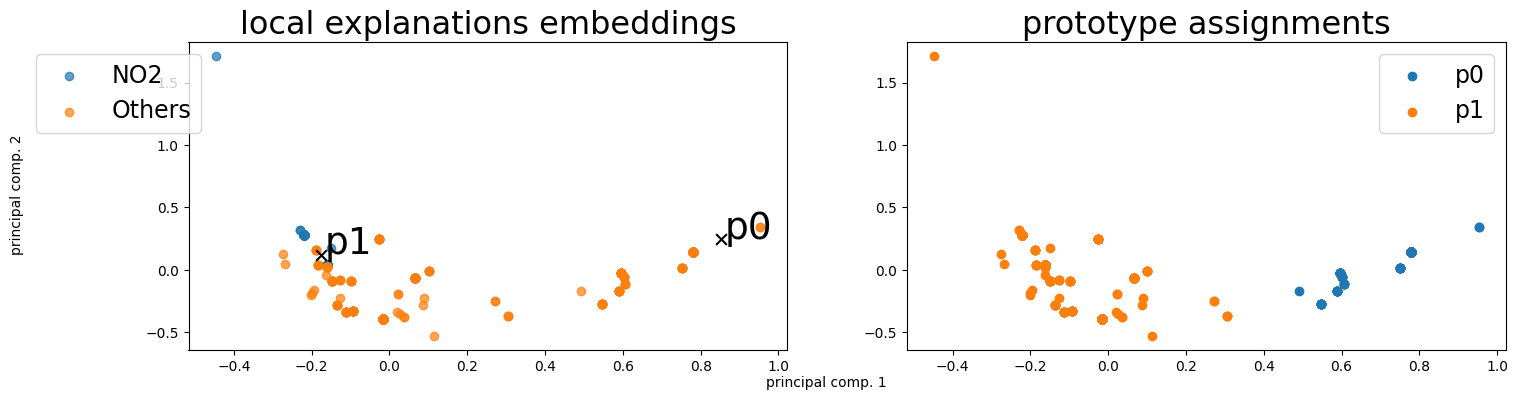

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.852296 +- 0.147704
Concept distribution:  (array([0, 1]), array([168, 958]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


160: Loss: 0.00024, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00115, V. LEN 0.000
161: Loss: 0.00021, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00131, V. LEN 0.000
162: Loss: 0.00021, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00181, V. LEN 0.000
163: Loss: 0.00068, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00204, V. LEN 0.000
164: Loss: 0.00079, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00145, V. LEN 0.000
165: Loss: 0.00020, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00318, V. LEN 0.000
166: Loss: 0.00049, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00225, V. LEN 0.000
167: Loss: 0.00030, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00102, V. LEN 0.00

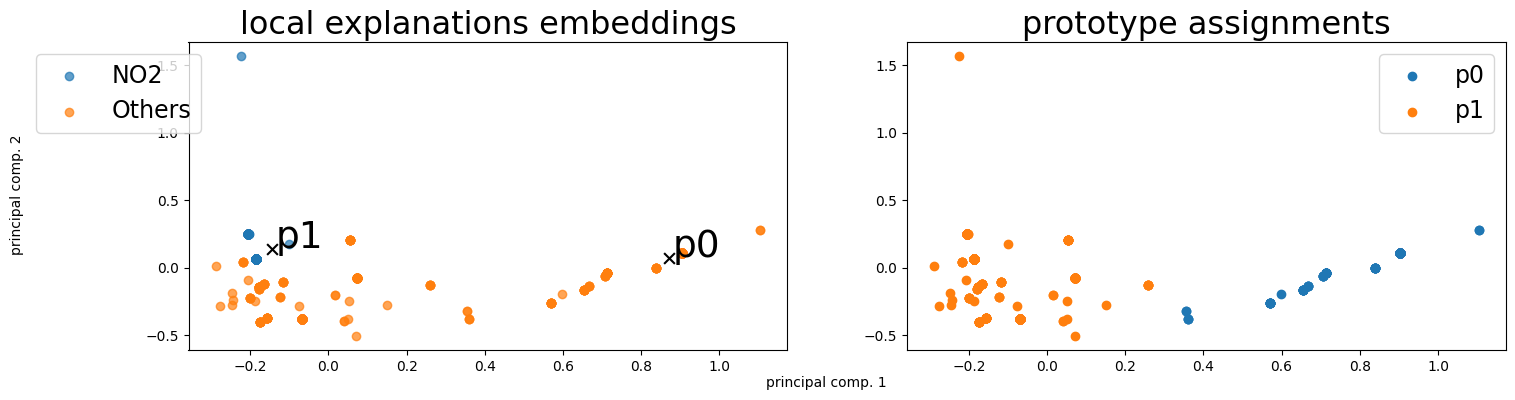

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.854145 +- 0.145855
Concept distribution:  (array([0, 1]), array([173, 953]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


180: Loss: 0.00036, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00068, V. LEN 0.000
181: Loss: 0.00058, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00058, V. LEN 0.000
182: Loss: 0.00029, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00041, V. LEN 0.000
183: Loss: 0.00028, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00025, V. LEN 0.000
184: Loss: 0.00039, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00024, V. LEN 0.000
185: Loss: 0.00022, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00032, V. LEN 0.000
186: Loss: 0.00047, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00039, V. LEN 0.000
187: Loss: 0.00030, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00105, V. LEN 0.00

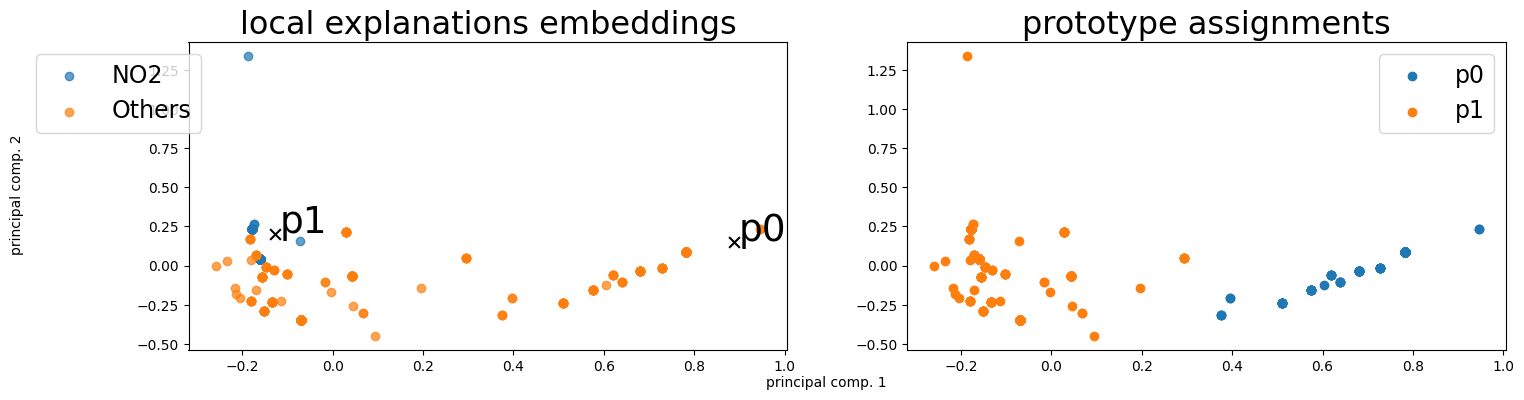

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.854145 +- 0.145855
Concept distribution:  (array([0, 1]), array([173, 953]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


200: Loss: 0.00024, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00113, V. LEN 0.000
201: Loss: 0.00019, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00144, V. LEN 0.000
202: Loss: 0.00020, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00151, V. LEN 0.000
203: Loss: 0.00021, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00098, V. LEN 0.000
204: Loss: 0.00022, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00073, V. LEN 0.000
205: Loss: 0.00019, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00059, V. LEN 0.000
206: Loss: 0.00026, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00041, V. LEN 0.000
207: Loss: 0.00028, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00030, V. LEN 0.00

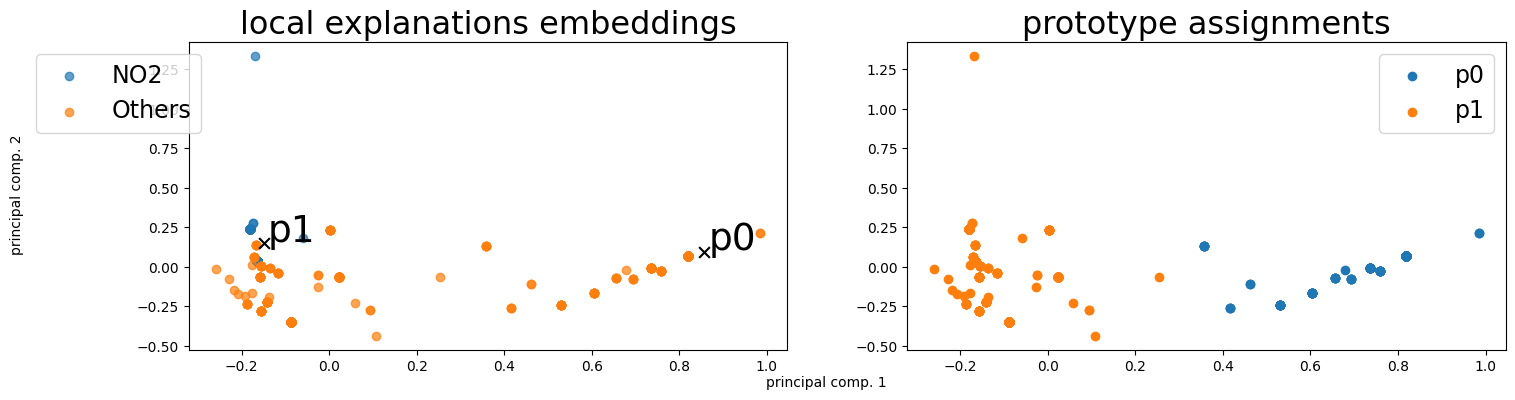

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.856013 +- 0.143987
Concept distribution:  (array([0, 1]), array([178, 948]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


220: Loss: 0.00017, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00063, V. LEN 0.000
221: Loss: 0.00019, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00050, V. LEN 0.000
222: Loss: 0.00020, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00049, V. LEN 0.000
223: Loss: 0.00022, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00061, V. LEN 0.000
224: Loss: 0.00020, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00026, V. LEN 0.000
225: Loss: 0.00018, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00041, V. LEN 0.000
226: Loss: 0.00043, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00066, V. LEN 0.000
227: Loss: 0.00020, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00077, V. LEN 0.00

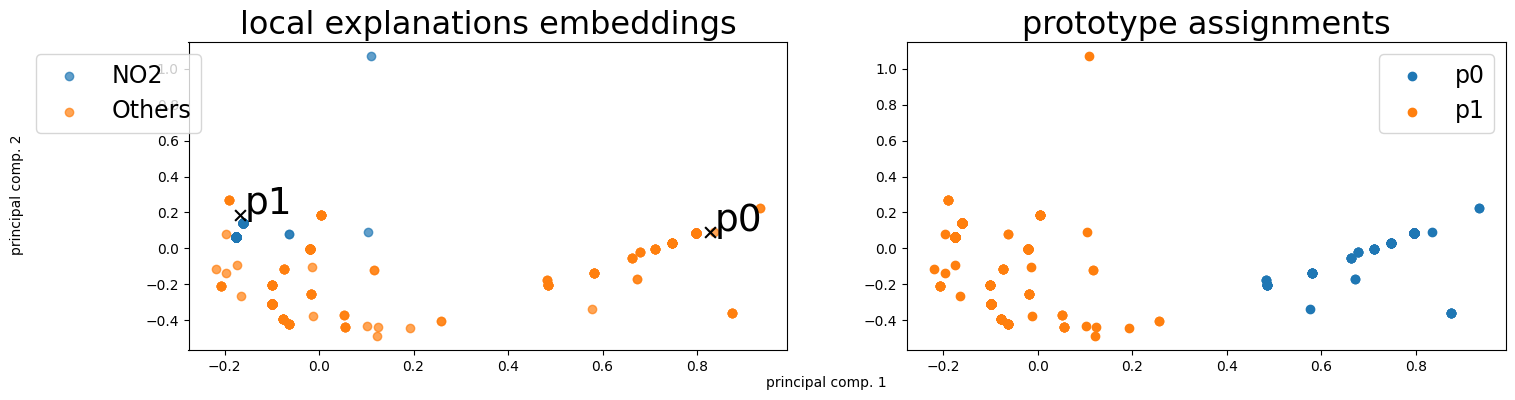

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.856389 +- 0.143611
Concept distribution:  (array([0, 1]), array([179, 947]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


240: Loss: 0.00019, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00027, V. LEN 0.000
241: Loss: 0.00015, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00020, V. LEN 0.000
242: Loss: 0.00015, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00021, V. LEN 0.000
243: Loss: 0.00020, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00023, V. LEN 0.000
244: Loss: 0.00017, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00051, V. LEN 0.000
245: Loss: 0.00015, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00078, V. LEN 0.000
246: Loss: 0.00012, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00118, V. LEN 0.000
247: Loss: 0.00014, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00104, V. LEN 0.00

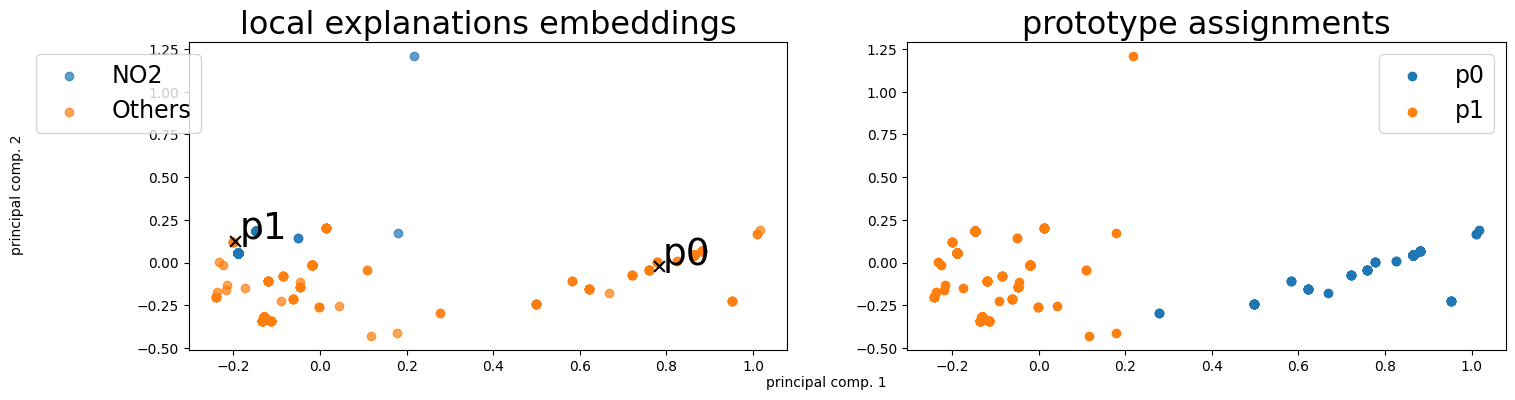

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.857143 +- 0.142857
Concept distribution:  (array([0, 1]), array([181, 945]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


260: Loss: 0.00037, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00066, V. LEN 0.000
261: Loss: 0.00017, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00027, V. LEN 0.000
262: Loss: 0.00036, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00041, V. LEN 0.000
263: Loss: 0.00024, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00053, V. LEN 0.000
264: Loss: 0.00032, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00018, V. LEN 0.000
265: Loss: 0.00027, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00030, V. LEN 0.000
266: Loss: 0.00026, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00027, V. LEN 0.000
267: Loss: 0.00018, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00015, V. LEN 0.00

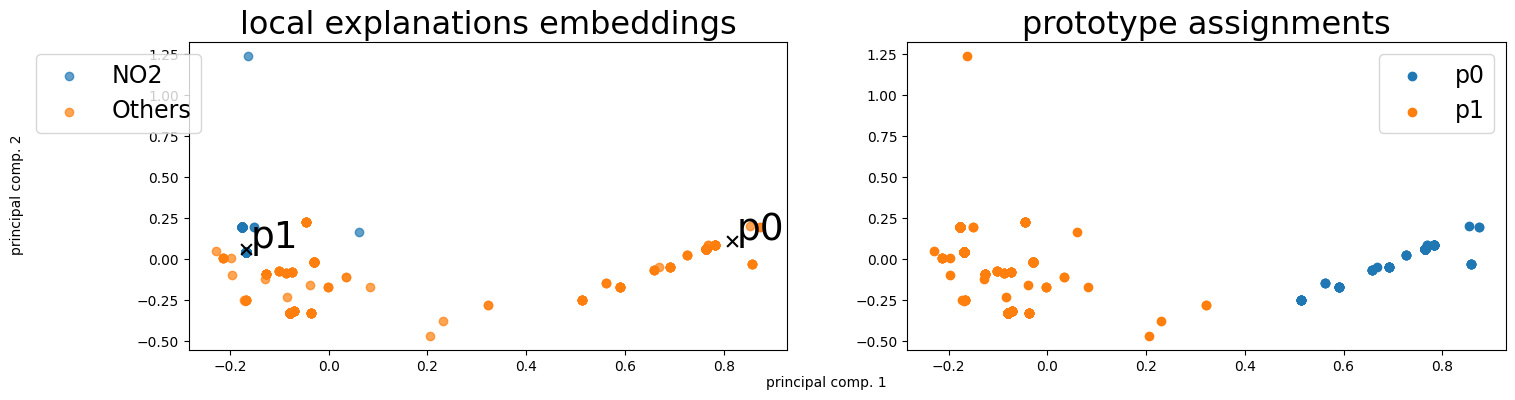

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.856389 +- 0.143611
Concept distribution:  (array([0, 1]), array([179, 947]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


280: Loss: 0.00012, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00027, V. LEN 0.000
281: Loss: 0.00012, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00046, V. LEN 0.000
282: Loss: 0.00014, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00043, V. LEN 0.000
283: Loss: 0.00011, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00099, V. LEN 0.000
284: Loss: 0.00019, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00108, V. LEN 0.000
285: Loss: 0.00029, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00054, V. LEN 0.000
286: Loss: 0.00013, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00132, V. LEN 0.000
287: Loss: 0.00016, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00111, V. LEN 0.00

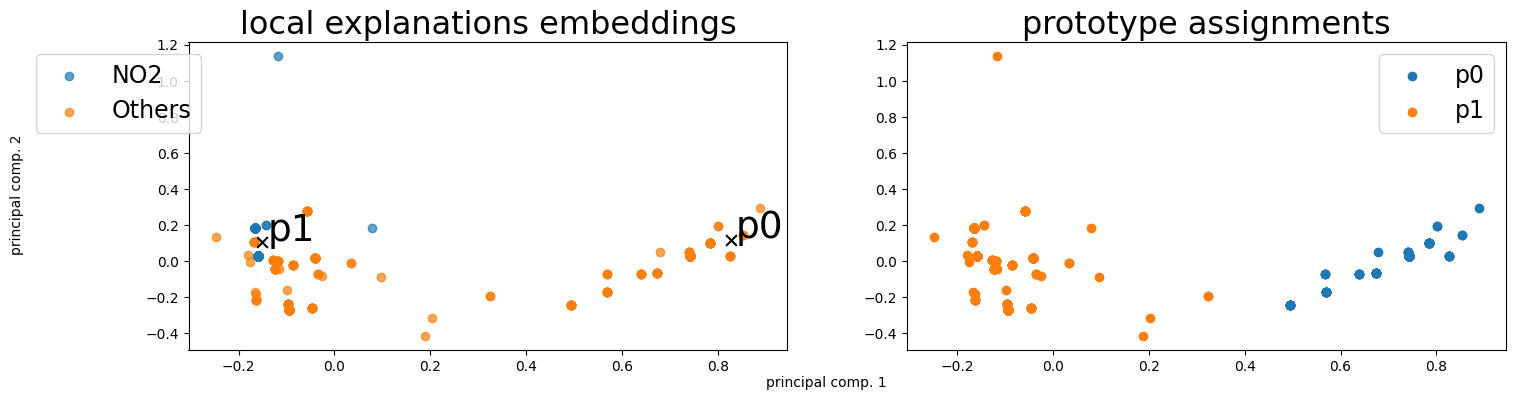

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.856389 +- 0.143611
Concept distribution:  (array([0, 1]), array([179, 947]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


300: Loss: 0.00033, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00049, V. LEN 0.000
301: Loss: 0.00012, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00030, V. LEN 0.000
302: Loss: 0.00013, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00018, V. LEN 0.000
303: Loss: 0.00018, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00037, V. LEN 0.000
304: Loss: 0.00012, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00027, V. LEN 0.000
305: Loss: 0.00010, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00046, V. LEN 0.000
306: Loss: 0.00010, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00071, V. LEN 0.000
307: Loss: 0.00011, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00058, V. LEN 0.00

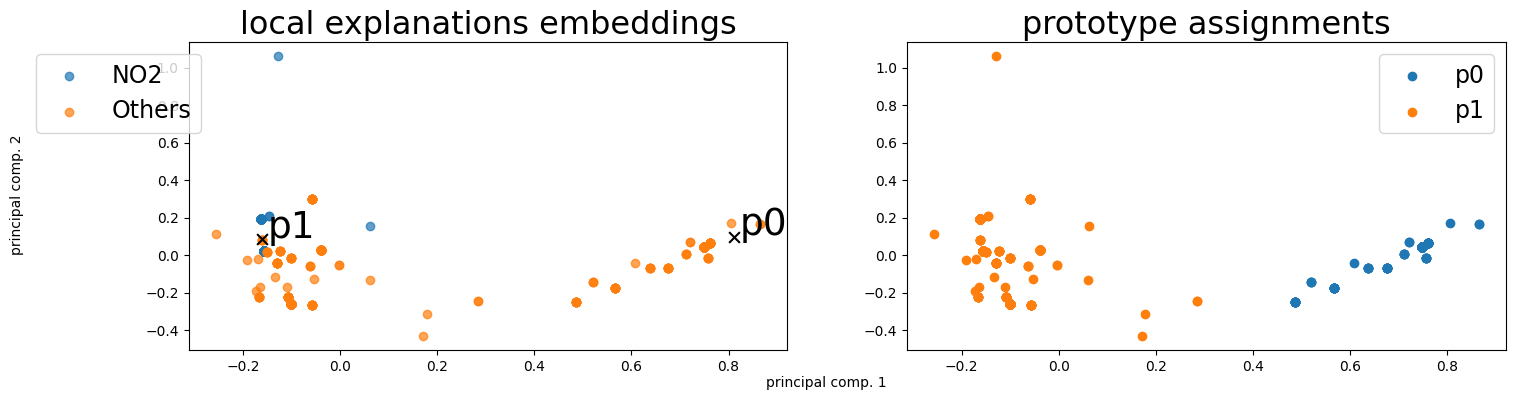

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.856389 +- 0.143611
Concept distribution:  (array([0, 1]), array([179, 947]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


320: Loss: 0.00008, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00040, V. LEN 0.000
321: Loss: 0.00009, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00030, V. LEN 0.000
322: Loss: 0.00009, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00058, V. LEN 0.000
323: Loss: 0.00008, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00065, V. LEN 0.000
324: Loss: 0.00009, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00088, V. LEN 0.000
325: Loss: 0.00008, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00104, V. LEN 0.000
326: Loss: 0.00009, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00072, V. LEN 0.000
327: Loss: 0.00014, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00030, V. LEN 0.00

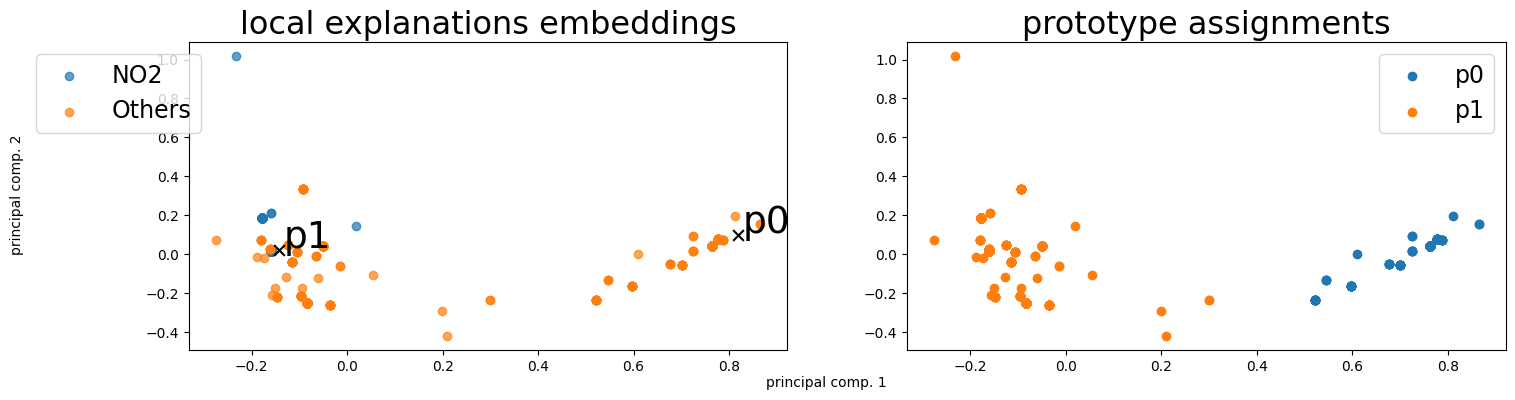

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.856389 +- 0.143611
Concept distribution:  (array([0, 1]), array([179, 947]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


340: Loss: 0.00009, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00024, V. LEN 0.000
341: Loss: 0.00011, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00029, V. LEN 0.000
342: Loss: 0.00007, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00040, V. LEN 0.000
343: Loss: 0.00020, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00071, V. LEN 0.000
344: Loss: 0.00008, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00171, V. LEN 0.000
345: Loss: 0.00015, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00198, V. LEN 0.000
346: Loss: 0.00009, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00168, V. LEN 0.000
347: Loss: 0.00025, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00130, V. LEN 0.00

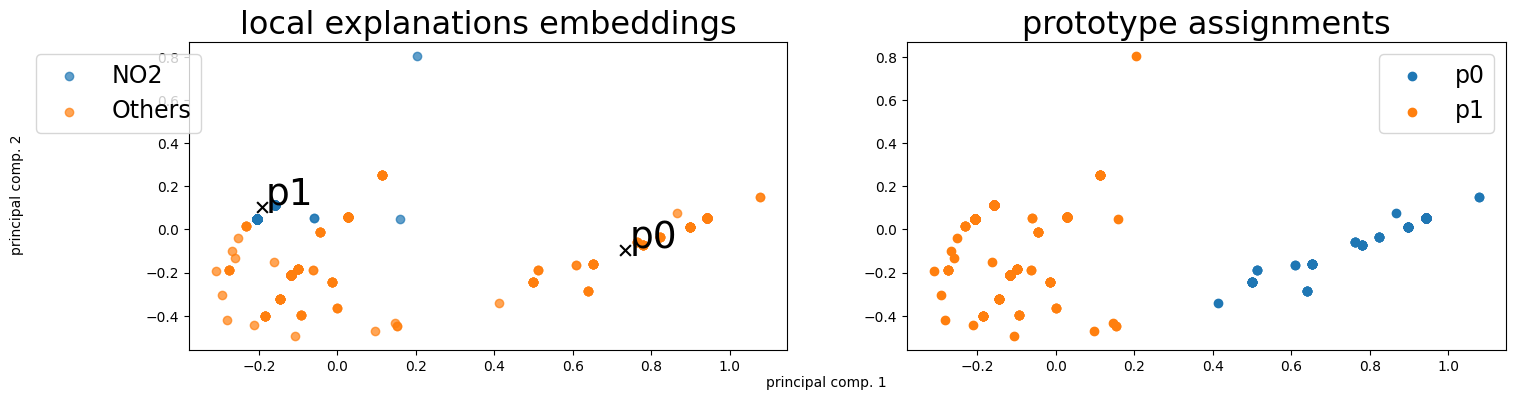

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.856389 +- 0.143611
Concept distribution:  (array([0, 1]), array([179, 947]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


360: Loss: 0.00027, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00070, V. LEN 0.000
361: Loss: 0.00024, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00023, V. LEN 0.000
362: Loss: 0.00011, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00052, V. LEN 0.000
363: Loss: 0.00009, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00071, V. LEN 0.000
364: Loss: 0.00011, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00075, V. LEN 0.000
365: Loss: 0.00009, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00054, V. LEN 0.000
366: Loss: 0.00008, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00035, V. LEN 0.000
367: Loss: 0.00007, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00036, V. LEN 0.00

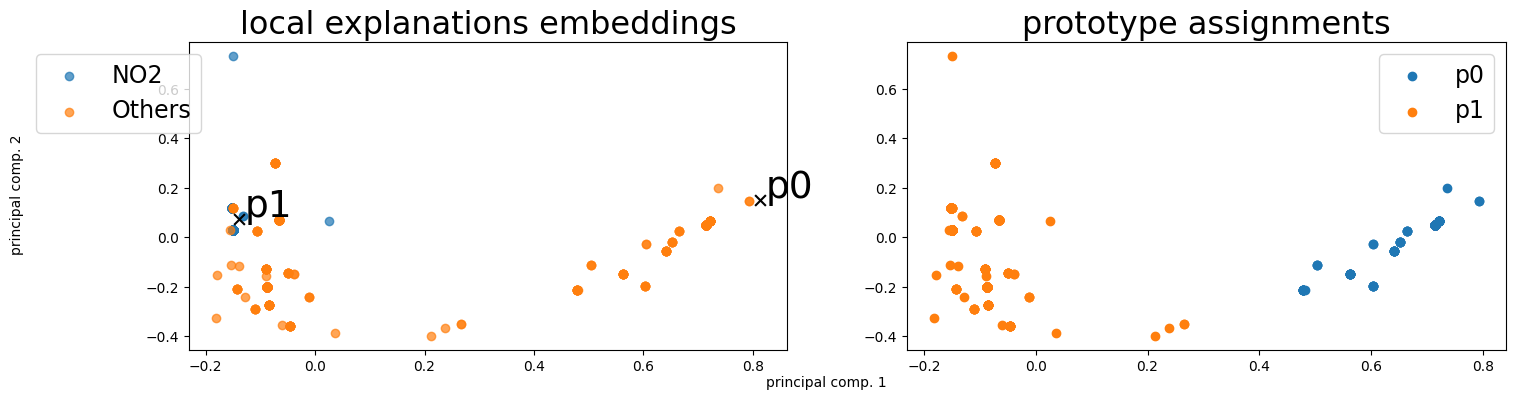

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.856389 +- 0.143611
Concept distribution:  (array([0, 1]), array([179, 947]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


380: Loss: 0.00006, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00088, V. LEN 0.000
381: Loss: 0.00010, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00092, V. LEN 0.000
382: Loss: 0.00006, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00073, V. LEN 0.000
383: Loss: 0.00006, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00091, V. LEN 0.000
384: Loss: 0.00063, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00094, V. LEN 0.000
385: Loss: 0.00010, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00018, V. LEN 0.000
386: Loss: 0.00012, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00008, V. LEN 0.000
387: Loss: 0.00010, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00010, V. LEN 0.00

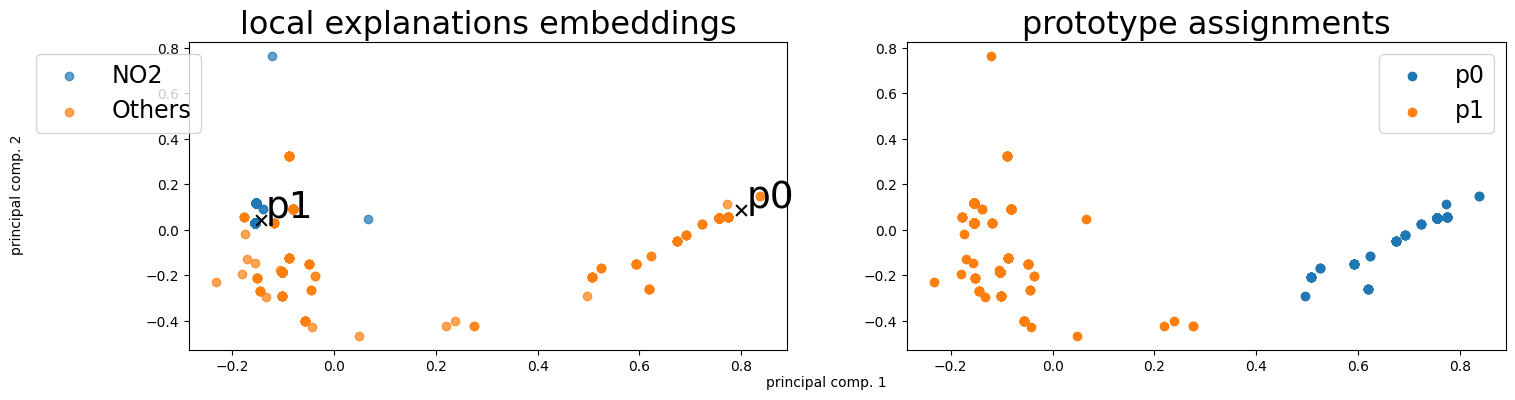

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.856389 +- 0.143611
Concept distribution:  (array([0, 1]), array([179, 947]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


400: Loss: 0.00009, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00013, V. LEN 0.000
401: Loss: 0.00007, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00016, V. LEN 0.000
402: Loss: 0.00007, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00053, V. LEN 0.000
403: Loss: 0.00022, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00116, V. LEN 0.000
404: Loss: 0.00006, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00059, V. LEN 0.000
405: Loss: 0.00006, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00040, V. LEN 0.000
406: Loss: 0.00016, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00046, V. LEN 0.000
407: Loss: 0.00006, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00015, V. LEN 0.00

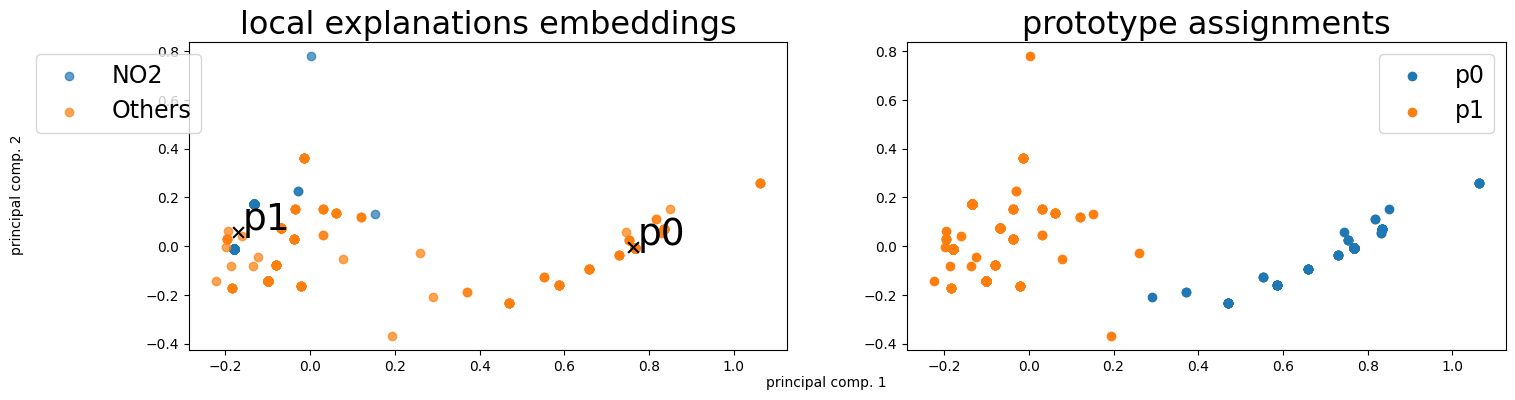

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.857521 +- 0.142479
Concept distribution:  (array([0, 1]), array([182, 944]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


420: Loss: 0.00007, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00026, V. LEN 0.000
421: Loss: 0.00014, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00014, V. LEN 0.000
422: Loss: 0.00012, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00009, V. LEN 0.000
423: Loss: 0.00015, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00045, V. LEN 0.000
424: Loss: 0.00019, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00044, V. LEN 0.000
425: Loss: 0.00016, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00094, V. LEN 0.000
426: Loss: 0.00067, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00044, V. LEN 0.000
427: Loss: 0.00013, LEN: 0.000000, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.00037, V. LEN 0.00

In [23]:
train_group_loader = utils.build_dataloader(dataset_train, belonging_train, num_input_graphs=128)
val_group_loader   = utils.build_dataloader(dataset_val,   belonging_val, num_input_graphs=256)
test_group_loader  = utils.build_dataloader(dataset_test,  belonging_test, num_input_graphs=256)


torch.manual_seed(42)
len_model    = models.LEN(hyper_params["num_prototypes"], 
                          hyper_params["LEN_temperature"], 
                          remove_attention=hyper_params["remove_attention"]).to(device)
le_model     = models.LEEmbedder(num_features=hyper_params["num_le_features"], 
                                 activation=hyper_params["activation"], 
                                 num_hidden=hyper_params["dim_prototypes"]).to(device)
expl         = models.GLGExplainer(len_model, 
                                   le_model, 
                                   device, 
                                   hyper_params=hyper_params,
                                   classes_names=mutag_classes_names,
                                   dataset_name=DATASET_NAME,
                                   num_classes=len(train_group_loader.dataset.data.task_y.unique())
                                  ).to(device)

expl.iterate(train_group_loader, val_group_loader, plot=True)

(array([0., 1.], dtype=float32), array([74, 65]))
[0.87583196 0.11425062]


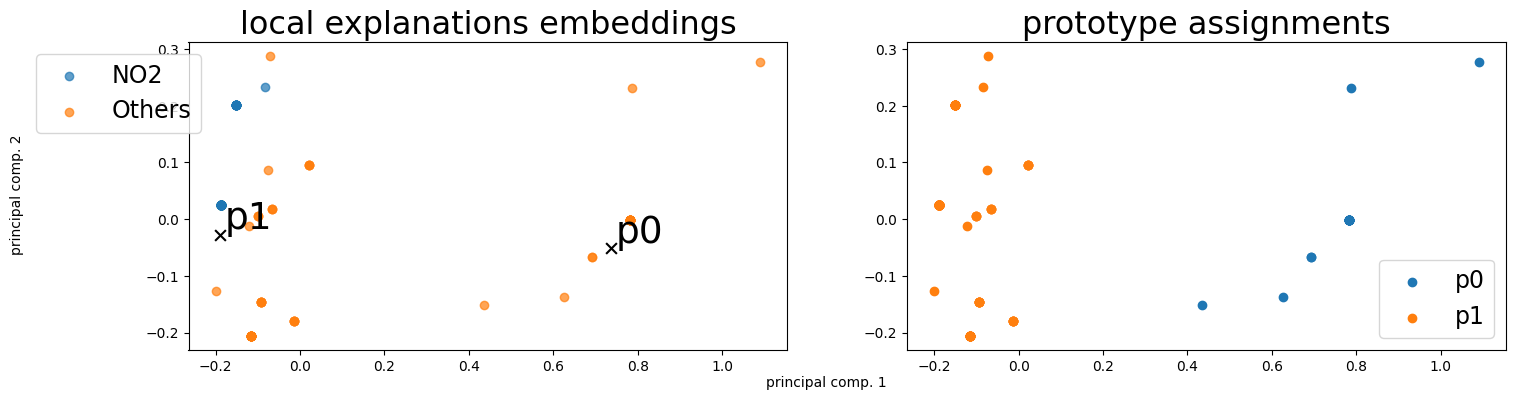

Alpha norms:
tensor([[1.0000, 0.6722],
        [0.7495, 1.0000]])
Concept Purity: 0.816239 +- 0.183761
Concept distribution:  (array([0, 1]), array([ 22, 117]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


In [24]:
expl.inspect(test_group_loader)

## Load Trained Model

[{'params': [Parameter containing:
tensor([[-2.6096e-01, -1.9123e-01, -2.4217e-01, -8.0840e-02, -9.7363e-02,
          3.8270e-02, -4.9420e-02,  1.2563e-01,  2.4502e-01,  9.5891e-02,
         -1.0529e-01, -2.5026e-01,  9.6803e-02, -1.3242e-01],
        [ 1.3600e-01,  1.7866e-01,  1.0309e-01,  2.5077e-01,  2.5384e-01,
          5.6590e-02, -1.9474e-01,  2.3878e-01, -1.2681e-01, -1.2624e-01,
          2.2364e-01,  2.0708e-01,  8.0753e-02,  1.6753e-02],
        [-2.2481e-01, -2.7743e-02,  2.5634e-01,  6.8060e-02,  2.2882e-02,
         -5.5497e-02, -9.3216e-02,  1.5929e-01,  1.6482e-02,  1.7387e-01,
         -4.7305e-02,  1.1677e-01,  1.1032e-01,  4.2619e-02],
        [ 1.6794e-01,  1.6748e-01,  2.4773e-01,  2.0546e-01, -6.8338e-02,
         -2.2627e-01,  4.8860e-02, -2.3327e-03, -6.9709e-02, -4.4754e-02,
          1.2570e-02,  1.9500e-01,  8.3316e-02, -9.4903e-02],
        [-1.0990e-01, -6.6182e-02, -1.0330e-01,  2.4033e-01,  1.4155e-01,
          2.4133e-01,  8.5353e-04,  5.3899e-02,  9.

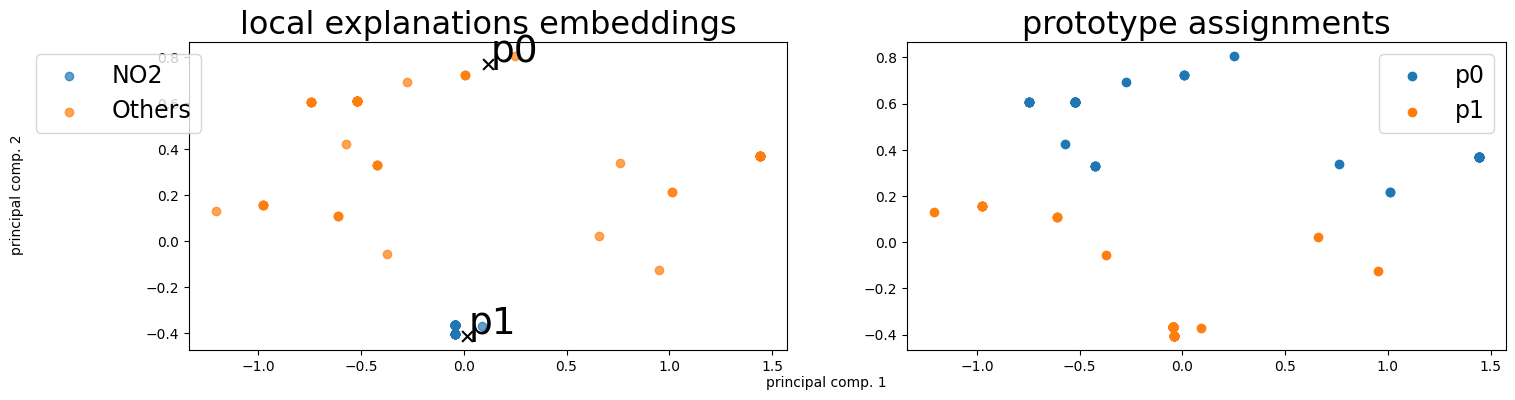

Alpha norms:
tensor([[1.0000, 0.9776],
        [0.4050, 1.0000]])
Concept Purity: 0.930233 +- 0.069767
Concept distribution:  (array([0, 1]), array([53, 86]))
Logic formulas:
For class 0:
0.826530612244898 ((feature0000000001) | ((feature0000000001 & feature0000000000)
For class 1:
0.826530612244898 ((feature0000000000)
Accuracy as classifier:  0.8265
LEN fidelity:  tensor(0.8265)


In [32]:
train_group_loader = utils.build_dataloader(dataset_train, belonging_train, num_input_graphs=128)
val_group_loader   = utils.build_dataloader(dataset_val,   belonging_val, num_input_graphs=256)
test_group_loader  = utils.build_dataloader(dataset_test,  belonging_test, num_input_graphs=256)


torch.manual_seed(42)
len_model2    = models.LEN(hyper_params["num_prototypes"], 
                           hyper_params["LEN_temperature"], 
                           remove_attention=hyper_params["remove_attention"]).to(device)
le_model2     = models.LEEmbedder(num_features=hyper_params["num_le_features"], 
                                  activation=hyper_params["activation"], 
                                  num_hidden=hyper_params["dim_prototypes"]).to(device)
best_expl     = models.GLGExplainer(len_model2, 
                                    le_model2, 
                                    device, 
                                    hyper_params=hyper_params,
                                    classes_names=mutag_classes_names,
                                    dataset_name=DATASET_NAME,
                                    num_classes=len(train_group_loader.dataset.data.task_y.unique())
                                  ).to(device)
best_expl.load_state_dict(torch.load("../trained_models/Mutagenicity.pt"))
best_expl.eval()

best_expl.inspect(test_group_loader)

### materialize prototypes

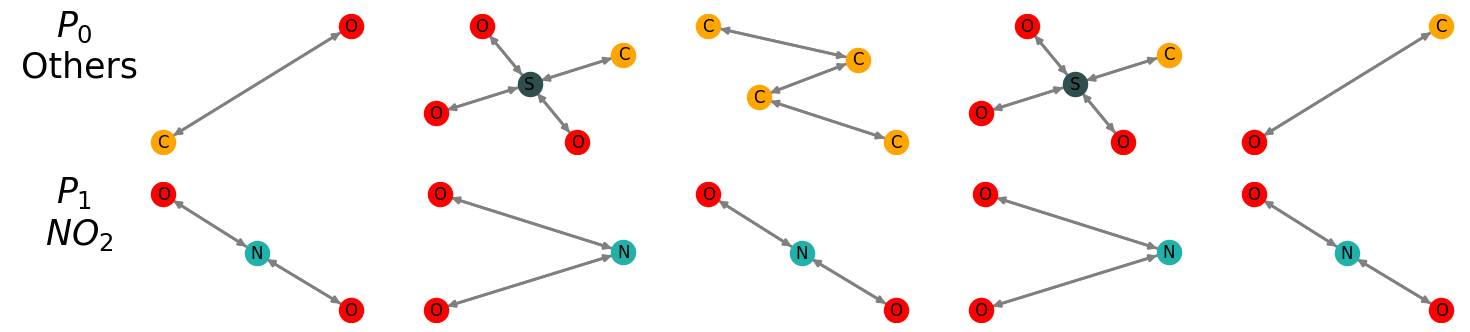

In [26]:
# change assign function to a non-discrete one just to compute distance between local expls. and prototypes
# useful to show the materialization of prototypes based on distance 
best_expl.hyper["assign_func"] = "sim"

x_train , emb , concepts_assignement , y_train_1h , le_classes , le_idxs , belonging = best_expl.get_concept_vector(train_group_loader, 
                                                                                                                    return_raw=True)
best_expl.hyper["assign_func"] = "discrete"

proto_names = {
    0: "Others",
    1: "$NO_2$",
}
torch.manual_seed(42)
fig = plt.figure(figsize=(17,4))
n = 0
for p in range(best_expl.hyper["num_prototypes"]):
    idxs = le_idxs[concepts_assignement.argmax(-1) == p]
    idxs = idxs[torch.randperm(len(idxs))] # for random examples
    sa = concepts_assignement[concepts_assignement.argmax(-1) == p]
    idxs = idxs[torch.argsort(sa[:, p], descending=True)]
    
    for ex in range(5):
        n += 1
        plt.subplot(best_expl.hyper["num_prototypes"],5,n)        
        utils.plot_molecule(dataset_train[int(idxs[ex])], composite_plot=True)

for p in range(best_expl.hyper["num_prototypes"]):
    plt.subplot(best_expl.hyper["num_prototypes"],5,5*p + 1)
    plt.ylabel(f"$P_{p}$\n {proto_names[p]}", size=25, rotation="horizontal", labelpad=50)

plt.show()